# 探索性分析

## 导入模块

In [1]:
from load_data import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visualization
import util

sns.set(style="ticks", color_codes=True)

## 加载数据

In [2]:
ijcai_18_train, ijcai_18_test = load_data()

### 数据基本信息

本数据集共有27个原始特征字段（含id和label），共496509条记录。其中包括：

- 训练集：478,138条记录
- 测试集：18,371条记录

(训练集包含分类标签：is_trade)
![](../etc/Inter_Ad_Algo.svg)
在分析时，将合并训练集和测试集，方便数据处理

In [3]:
ijcai_18_test['is_trade'] = -1 # test label 标注为-1，用以区分训练集和数据集
ijcai_18_merged = pd.concat([ijcai_18_train, ijcai_18_test], axis=0)
ijcai_18_merged.head().T

,0,1,2,3,4
instance_id,108641074714126964,5754713551599725161,842679481291040981,937088850059189027,7975697065017708072
item_id,3412720377098676069,3412720377098676069,3412720377098676069,3412720377098676069,3412720377098676069
item_category_list,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520
item_property_list,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...
item_brand_id,1975590437749032870,1975590437749032870,1975590437749032870,1975590437749032870,1975590437749032870
item_city_id,3948283326616421003,3948283326616421003,3948283326616421003,3948283326616421003,3948283326616421003
item_price_level,3,3,3,3,3
item_sales_level,3,3,3,3,3
item_collected_level,4,4,4,4,4
item_pv_level,14,14,14,14,14


In [4]:
ijcai_18_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496509 entries, 0 to 18370
Data columns (total 27 columns):
instance_id                  496509 non-null int64
item_id                      496509 non-null int64
item_category_list           496509 non-null object
item_property_list           496509 non-null object
item_brand_id                496509 non-null int64
item_city_id                 496509 non-null int64
item_price_level             496509 non-null int64
item_sales_level             496509 non-null int64
item_collected_level         496509 non-null int64
item_pv_level                496509 non-null int64
user_id                      496509 non-null int64
user_gender_id               496509 non-null int64
user_age_level               496509 non-null int64
user_occupation_id           496509 non-null int64
user_star_level              496509 non-null int64
context_id                   496509 non-null int64
context_timestamp            496509 non-null int64
context_page_id      

可以看出，其中有部分数据格式存在问题，需要手工修改

In [5]:
remodified_rows = (
    ('instance_id', np.object),
    ('item_id', np.object),
    ('item_brand_id', np.object),
    ('item_city_id', np.object),
    ('user_id', np.object),
    ('user_gender_id', np.object),
    ('user_occupation_id', np.object),
    ('context_id', np.object),
    ('context_page_id', np.object),
    ('shop_id', np.object),
    ('is_trade', np.object),
)
for row, retype in remodified_rows:
    ijcai_18_merged[row] = ijcai_18_merged[row].astype(retype)

In [6]:
ijcai_18_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496509 entries, 0 to 18370
Data columns (total 27 columns):
instance_id                  496509 non-null object
item_id                      496509 non-null object
item_category_list           496509 non-null object
item_property_list           496509 non-null object
item_brand_id                496509 non-null object
item_city_id                 496509 non-null object
item_price_level             496509 non-null int64
item_sales_level             496509 non-null int64
item_collected_level         496509 non-null int64
item_pv_level                496509 non-null int64
user_id                      496509 non-null object
user_gender_id               496509 non-null object
user_age_level               496509 non-null int64
user_occupation_id           496509 non-null object
user_star_level              496509 non-null int64
context_id                   496509 non-null object
context_timestamp            496509 non-null int64
context_page_

In [7]:
ijcai_18_test = ijcai_18_merged[ijcai_18_merged.is_trade == -1]
ijcai_18_train = ijcai_18_merged[ijcai_18_merged.is_trade != -1]

## 字段分析
### 查看数据分布

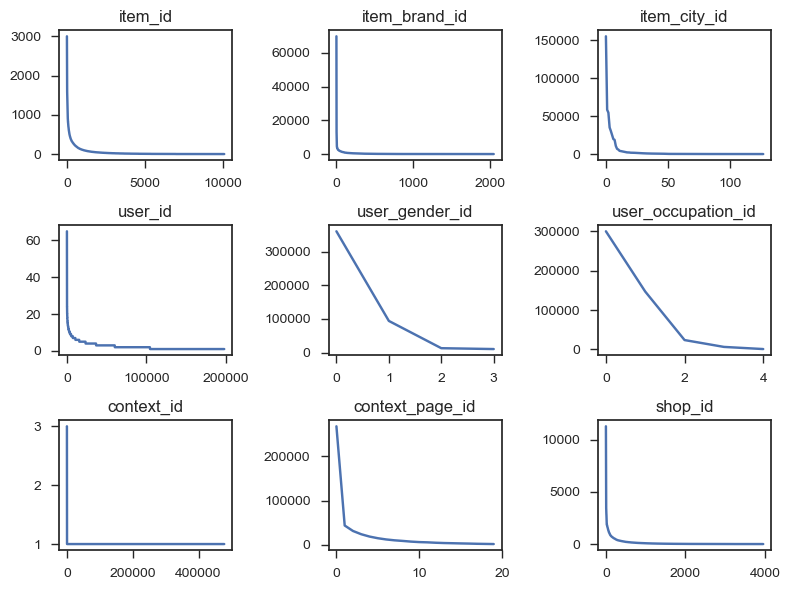

In [8]:
rows = (
    'item_id',
    'item_brand_id',
    'item_city_id',
    'user_id',
    'user_gender_id',
    'user_occupation_id',
    'context_id',
    'context_page_id',
    'shop_id'
)
plt.figure(figsize=(8,6),dpi=100)
for idx in range(len(rows)):
    plt.subplot(3, 3, idx + 1)
    plt.plot(ijcai_18_train[rows[idx]].value_counts().values)
    plt.title(rows[idx])
plt.tight_layout()
plt.show()

### 各特征详细分析
#### User_ID

In [9]:
user_id = ijcai_18_merged.groupby("user_id")

In [10]:
user_id.is_trade.count().describe()

count    207641.000000
mean          2.391190
std           2.364709
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          65.000000
Name: is_trade, dtype: float64

可以看出，75%的用户仅含有3条记录，因此舍弃本字段。

#### context_id

In [11]:
context_id = ijcai_18_merged.groupby("context_id")
context_id.is_trade.count().describe()

count    496482.000000
mean          1.000054
std           0.007902
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: is_trade, dtype: float64

和User_id一样，绝大多数的上下文仅出现过一次，删除

In [12]:
del ijcai_18_merged["context_id"]
del ijcai_18_merged["user_id"]

#### item_id

In [13]:
item_id = ijcai_18_merged.groupby("item_id")
item_id.is_trade.count().describe()

count    10236.000000
mean        48.506155
std        149.957748
min          1.000000
25%          2.000000
50%          7.000000
75%         30.000000
max       3123.000000
Name: is_trade, dtype: float64

item_id重复频率较多，先做保留

#### shop_id

In [14]:
shop_id = ijcai_18_merged.groupby("shop_id")
shop_id.is_trade.count().describe()

count     4003.000000
mean       124.034224
std        423.881713
min          1.000000
25%          4.000000
50%         16.000000
75%         81.000000
max      11767.000000
Name: is_trade, dtype: float64

同item_id，保留该字段

In [15]:
ijcai_18_test = ijcai_18_merged[ijcai_18_merged.is_trade == -1]
ijcai_18_train = ijcai_18_merged[ijcai_18_merged.is_trade != -1]

### 用户信息分析

#### 用户性别信息
用户的预测性别分为4种
- 女性
- 男性
- 家庭用户
- 缺失

对此，本字段使用one-hot编码进行类型拆分

In [16]:
gender = pd.get_dummies(ijcai_18_merged.user_gender_id, prefix= 'user_gender_id')
ijcai_18_merged = pd.concat([ijcai_18_merged, gender], axis=1)
del ijcai_18_merged['user_gender_id']

#### 用户年龄

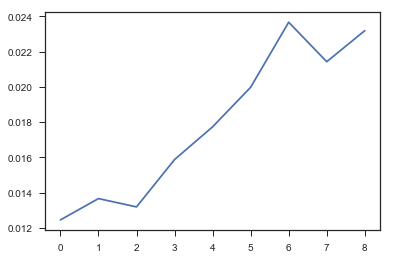

In [19]:
visualization.plt_by_col(ijcai_18_train, "user_age_level", "is_trade", 1)

#### 预测职业编号

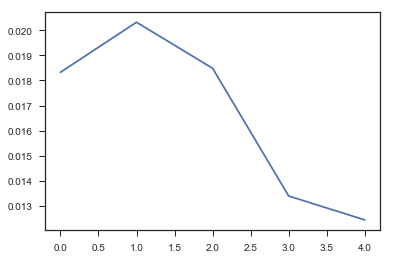

In [22]:
visualization.plt_by_col(ijcai_18_train, "user_occupation_id", "is_trade", 1)

#### 用户星级编号

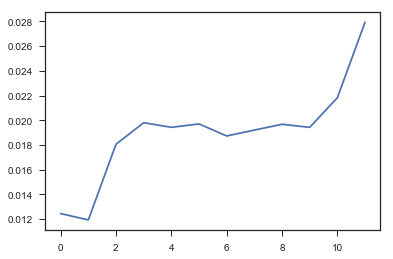

In [21]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].user_star_level.value_counts()
tot = ijcai_18_train.user_star_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

### 商户

#### 好评数量等级

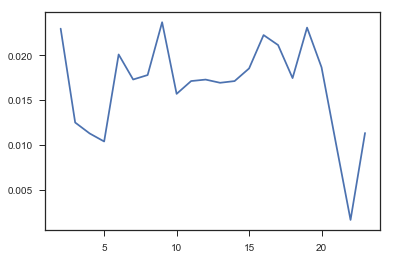

In [23]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].shop_review_num_level.value_counts()
tot = ijcai_18_train.shop_review_num_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

#### 星级编号

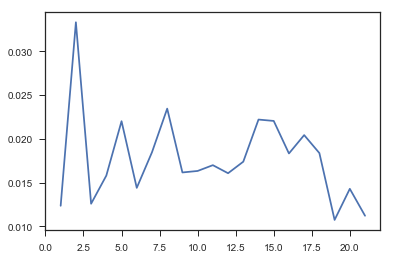

In [25]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].shop_star_level.value_counts()
tot = ijcai_18_train.shop_star_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

### 上下文信息

#### 展示页面编号

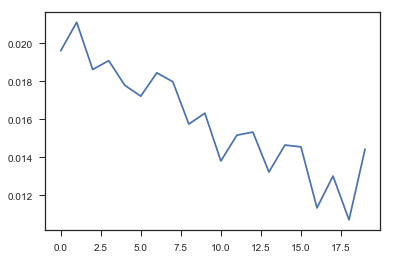

In [30]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].context_page_id.value_counts()
tot = ijcai_18_train.context_page_id.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

#### 广告商品编号

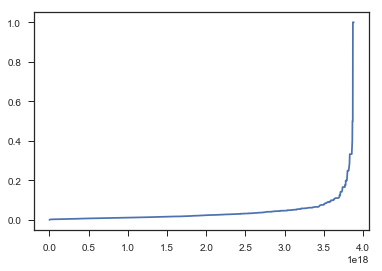

In [32]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_brand_id.value_counts()
tot = ijcai_18_train.item_brand_id.value_counts()

df = trade / tot
df.values.sort()
plt.plot(df)
plt.show()

#### 城市编号

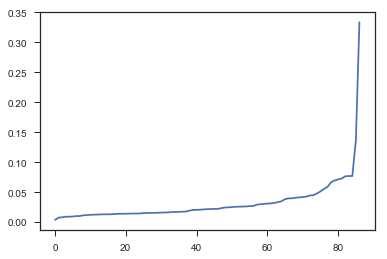

In [51]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_city_id.value_counts()
tot = ijcai_18_train.item_city_id.value_counts()

df = trade / tot
df.values.sort()
plt.plot(df.values)
plt.show()

#### 价格等级

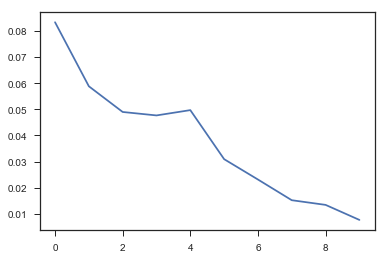

In [49]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_price_level.value_counts()
tot = ijcai_18_train.item_price_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

#### 销量等级

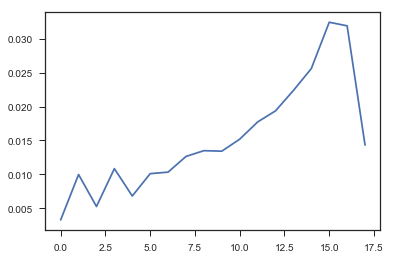

In [48]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_sales_level.value_counts()
tot = ijcai_18_train.item_sales_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

#### 收藏次数等级

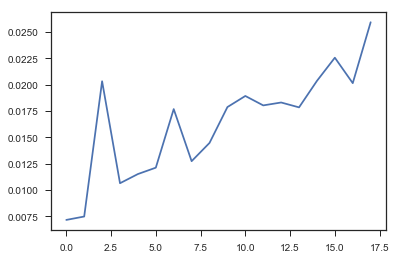

In [47]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_collected_level.value_counts()
tot = ijcai_18_train.item_collected_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

#### 展示次数等级

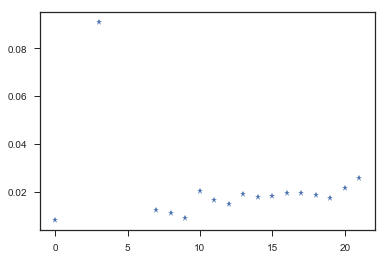

In [56]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_pv_level.value_counts()
tot = ijcai_18_train.item_pv_level.value_counts()

df = trade / tot
plt.plot(df, '*')
plt.show()

In [1]:
from load_data import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visualization
import util

sns.set(style="ticks", color_codes=True)

In [2]:
import feature_engineering

In [3]:
ijcai_18_merge = feature_engineering.get_dataset()

In [4]:
ijcai_18_merge.head()

,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,...,item_city_id_118,item_city_id_119,item_city_id_120,item_city_id_121,item_city_id_122,item_city_id_123,item_city_id_124,item_city_id_125,item_city_id_126,item_city_id_127
instance_id,,,,,,,,,,,,,,,,,,,,,
108641074714126964,0,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,0,0,3,3,4,14,0,...,0,0,0,0,0,0,0,0,0,0
5754713551599725161,0,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,0,0,3,3,4,14,1,...,0,0,0,0,0,0,0,0,0,0
842679481291040981,0,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,0,0,3,3,4,14,2,...,0,0,0,0,0,0,0,0,0,0
937088850059189027,0,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,0,0,3,3,4,14,3,...,0,0,0,0,0,0,0,0,0,0
7975697065017708072,0,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,0,0,3,3,4,14,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ijcai_18_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496509 entries, 108641074714126964 to 4931599763172137858
Columns: 172 entries, item_id to item_city_id_127
dtypes: float64(13), int64(16), object(6), uint8(137)
memory usage: 201.2+ MB


In [6]:
ijcai_18_merge.T

instance_id,108641074714126964,5754713551599725161,842679481291040981,937088850059189027,7975697065017708072,7764762765372067286,6956333474094867789,8387099821892927911,4021878205550012615,6499571365974135517,...,2916193909730283463,9161335756218550796,5289288820294504479,7401528437843873561,2670064366569012998,196556205576680664,3972597272081581867,7331170863335915445,4801514605649495171,4931599763172137858
item_id,0,0,0,0,0,0,1,1,2,1,...,4373,4374,2162,2162,2162,2162,2162,9996,9996,9996
item_category_list,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520,7908382889764677758;8277336076276184272,7908382889764677758;8277336076276184272,7908382889764677758;5755694407684602296,7908382889764677758;8277336076276184272,...,7908382889764677758;8277336076276184272,7908382889764677758;5755694407684602296,7908382889764677758;509660095530134768,7908382889764677758;509660095530134768,7908382889764677758;509660095530134768,7908382889764677758;509660095530134768,7908382889764677758;509660095530134768,7908382889764677758;8277336076276184272,7908382889764677758;8277336076276184272,7908382889764677758;8277336076276184272
item_property_list,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...,...,5131280576272319091;2636395404473730413;462193...,5131280576272319091;2636395404473730413;462193...,5131280576272319091;2636395404473730413;462193...,5131280576272319091;2636395404473730413;462193...,5131280576272319091;2636395404473730413;462193...,5131280576272319091;2636395404473730413;462193...,5131280576272319091;2636395404473730413;462193...,2636395404473730413;7344985833148694227;422690...,2636395404473730413;7344985833148694227;422690...,2636395404473730413;7344985833148694227;422690...
item_brand_id,0,0,0,0,0,0,1,1,2,1,...,266,266,608,608,608,608,608,2039,2039,2039
item_city_id,0,0,0,0,0,0,1,1,1,1,...,5,5,4,4,4,4,4,0,0,0
item_price_level,3,3,3,3,3,3,8,8,8,8,...,7,8,7,7,7,7,7,6,6,6
item_sales_level,3,3,3,3,3,3,9,9,9,9,...,8,10,11,11,11,11,11,10,10,10
item_collected_level,4,4,4,4,4,4,8,8,10,8,...,9,14,12,12,12,12,12,12,12,12
item_pv_level,14,14,14,14,14,14,13,13,16,13,...,14,13,16,16,16,16,16,11,11,11
user_id,0,1,2,3,4,5,6,7,8,9,...,207637,202677,202236,207638,207639,202688,202581,83813,109373,207640
